In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [2]:
import warnings

warnings.filterwarnings('ignore')

# 1.Import dataset

In [3]:
df=pd.read_csv(r"C:\Users\SAKET NANDAN\Documents\excel_R_lms\random_forest_assignment\iris.csv")

# 2.Exploratory data analysis

In [4]:
# view dimensions of dataset

df.shape

(150, 5)

In [5]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# View summary of dataset

In [7]:
df1=df

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df1.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

# Missing values in variables

# check missing values in variables

df1.isnull().sum()

# 3. Declare feature vector and target variable

In [12]:
x = df1.drop(['Species'], axis=1)

y = df1['Species']

In [13]:
#x
#y

# 4. Feature Scaling

In [14]:
x1=x

We now have x1 data set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling

In [15]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x1= scaler.fit_transform(x1)

In [16]:
x2 = pd.DataFrame(x1, columns=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'])

In [17]:
x2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


# 5. Split data into separate training and test set

In [19]:
# split X2 and y into training and testing sets

from sklearn.model_selection import train_test_split

x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size = 0.33, random_state = 42)

In [20]:
#x2_train
#x2_test
#y_test
#y_train

# 6. Random Forest Classifier model with default parameters

In [23]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(x2_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(x2_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9800


Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.



# 7. Random Forest Classifier model with parameter n_estimators=200

In [24]:
# instantiate the classifier with n_estimators = 200

rfc_200 = RandomForestClassifier(n_estimators=200, random_state=0)



# fit the model to the training set

rfc_200.fit(x2_train, y_train)



# Predict on the test set results

y_pred_200 = rfc_200.predict(x2_test)

# Check accuracy score 

print('Model accuracy score with 200 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_200)))


Model accuracy score with 200 decision-trees : 0.9800


no significant increase in accuracy after increasing n of estimators

# 8. Find important features with Random Forest model

In [25]:
# create the classifier with n_estimators = 200

clf = RandomForestClassifier(n_estimators=200, random_state=0)



# fit the model to the training set

clf.fit(x2_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Now, I will use the feature importance variable to see feature importance scores

In [26]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=x2_train.columns).sort_values(ascending=False)

feature_scores

Petal.Width     0.447759
Petal.Length    0.406940
Sepal.Length    0.106150
Sepal.Width     0.039152
dtype: float64

# 9. Visualize feature scores of the features

Now, I will visualize the feature scores with matplotlib and seaborn.



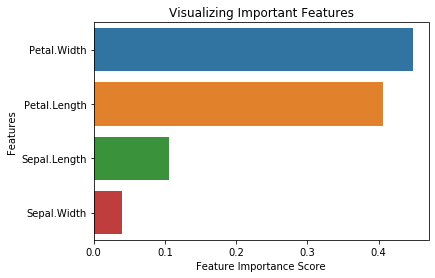

In [27]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

# 11. Build Random Forest model on selected features

Now, I will drop the least important features sepal.width from the model, rebuild the model and check its effect on accuracy.

In [28]:
# declare feature vector and target variable

x_f = x2.drop(['Sepal.Width'], axis=1)

y_f= df1['Species']

In [29]:
#x_f
#y_f

# Split data into separate training and test set


In [30]:
# split X_f and y_f into training and testing sets

from sklearn.model_selection import train_test_split

x_f_train, x_f_test, y_f_train, y_f_test = train_test_split(x_f, y_f, test_size = 0.33, random_state = 42)

In [31]:
#x_f_train
#x_f_test
#y_f_test
#y_f_train

In [32]:
# instantiate the classifier with n_estimators = 200

clf = RandomForestClassifier( n_estimators=200,random_state=0)



# fit the model to the training set

clf.fit(x_f_train, y_f_train)


# Predict on the test set results

y_f_pred = clf.predict(x_f_test)



# Check accuracy score 

print('Model accuracy score with US and Urban variables removed : {0:0.4f}'. format(accuracy_score(y_f_test, y_f_pred)))


Model accuracy score with US and Urban variables removed : 0.9800


after droping one column still its accuracy remain same

# 11. Confusion matrix

In [33]:
##Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_f_test, y_f_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


# 12. Classification Report

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_f_test, y_f_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

